In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv("C:/Users/ASUS/Downloads/Titanic-Dataset.csv")

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,1,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
 13  FamilySize   891 non-null    int64  
 14  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 104.5+ KB


In [23]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476,1.895623,1.904602,0.602694
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503,0.788465,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,2.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,4.000000,11.000000,1.000000


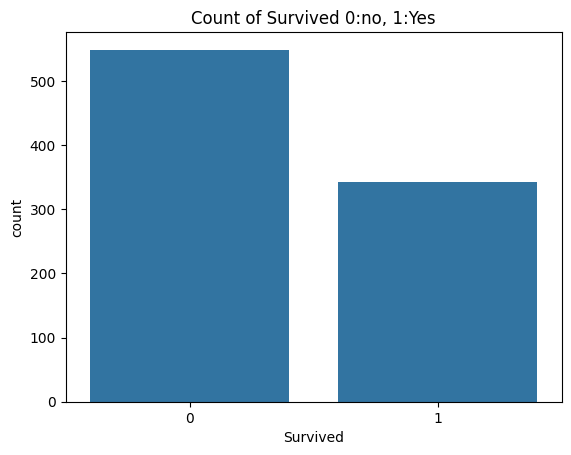

In [6]:
sns.countplot(data=data, x='Survived')
plt.title("Count of Survived 0:no, 1:Yes")
plt.show()

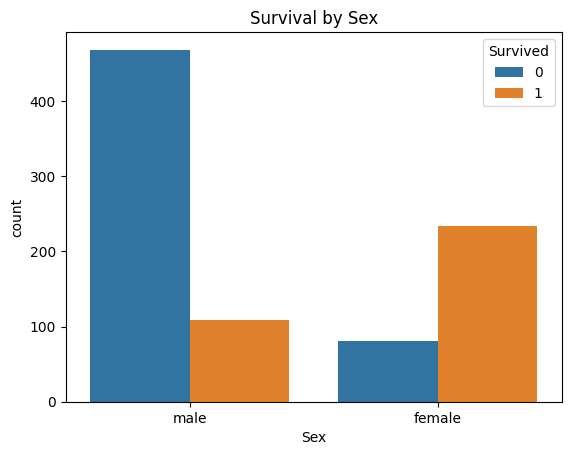

In [7]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

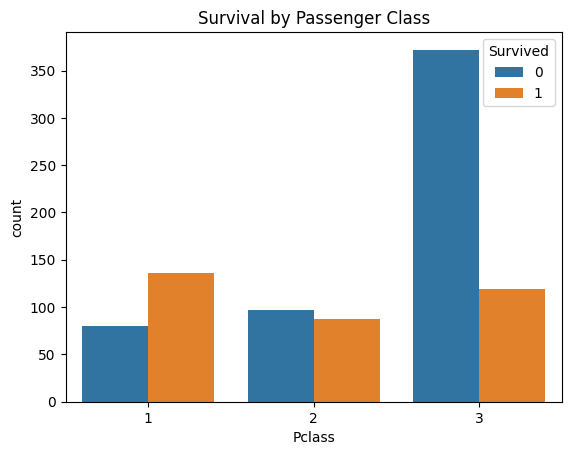

In [8]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

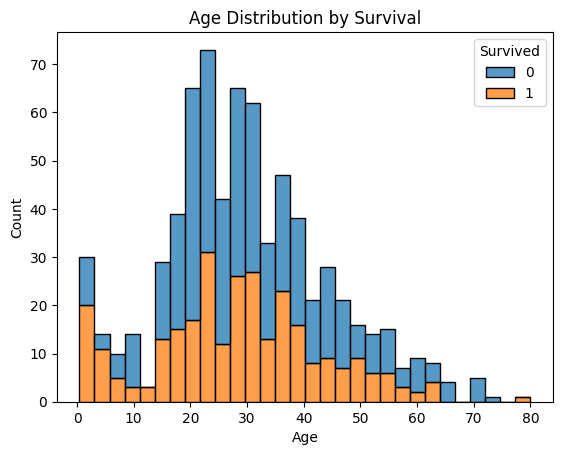

In [9]:
sns.histplot(data=data, x='Age', bins=30, hue='Survived', multiple='stack')
plt.title("Age Distribution by Survival")
plt.show()

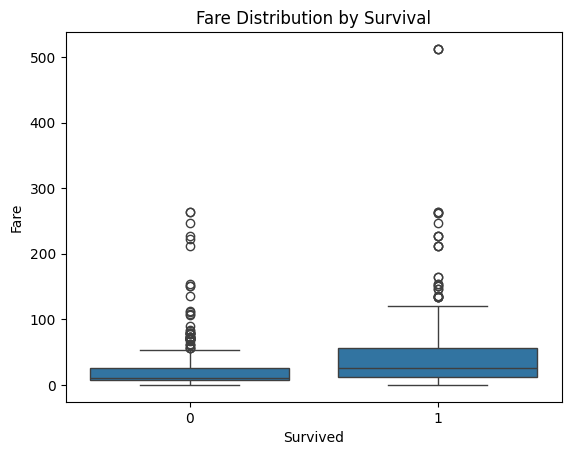

In [10]:
sns.boxplot(data=data, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival")
plt.show()

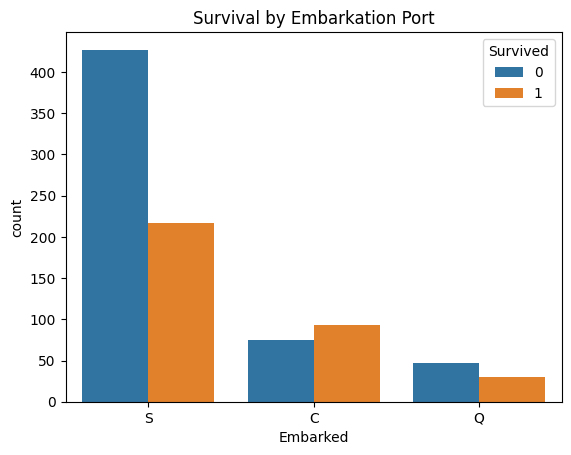

In [11]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title("Survival by Embarkation Port")
plt.show()

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt','Col',
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

In [13]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked']) 
data['Title'] = le.fit_transform(data['Title'])

In [14]:

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']
X = data[features]
y = data['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy:.4f}")


🎯 Model Accuracy: 0.8380


In [18]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importances:\n", importances)


Feature Importances:
 Fare          0.260724
Age           0.231092
Sex           0.208812
Title         0.110774
Pclass        0.076462
FamilySize    0.064406
Embarked      0.035069
IsAlone       0.012660
dtype: float64


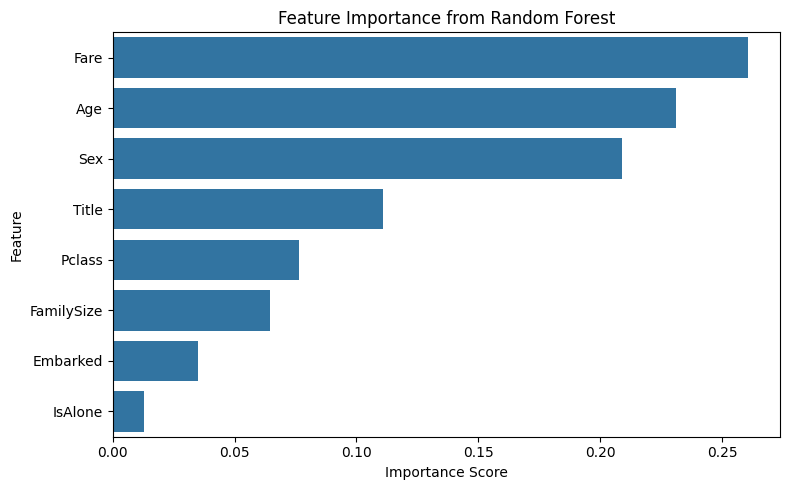

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

joblib.dump(model, 'task1_model_pred.pkl')


['task1_model_pred.pkl']